In [36]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
source("../../../figures/utils/figure_themes.r")

In [37]:
# set file path for importing the data
training_metrics_file <- file.path(paste0(
    "../../results/Multi_Class/MultiClass_MLP/SHSY5Y/training_metrics.csv"
))
confusion_matrix_file <- file.path(paste0(
    "../../results/Multi_Class/MultiClass_MLP/SHSY5Y/confusion_matrices.csv"
))

# read in the data
training_metrics <- read.csv(training_metrics_file)
# confusion_matrix <- read.csv(confusion_matrix_file)

In [38]:
# get the rows that contain the F1 scores
f1_scores <- training_metrics[training_metrics$metric == "f1-score",]
# remove the rows that contain the macro and weighted averages
f1_scores <- f1_scores[!grepl("macro avg", f1_scores$label),]
f1_scores <- f1_scores[!grepl("weighted avg", f1_scores$label),]
# muatate the label column for multiple cases
f1_scores$label <- gsub("healthy", "Healthy", f1_scores$label)
f1_scores$label <- gsub("apoptosis", "Apoptosis", f1_scores$label)
f1_scores$label <- gsub("pyroptosis", "Pyroptosis", f1_scores$label)
# mutate the data type column
f1_scores$group <- gsub("train", "Training", f1_scores$group)
f1_scores$group <- gsub("test", "Testing", f1_scores$group)
f1_scores$group <- gsub("validation", "Validation", f1_scores$group)
f1_scores$group <- gsub("holdout", "Holdout Wells", f1_scores$group)
# factorize the group column
f1_scores$group <- factor(f1_scores$group, levels = c(
    "Training", "Validation", "Testing", "Holdout Wells"
))


In [39]:
# make the label a factor so that the order is preserved
f1_scores$label <- factor(
    f1_scores$label, levels = c(
        "Healthy", "Apoptosis", "Pyroptosis"
        )
    )
f1_scores

,label,metric,value,group,shuffled_data
,<fct>,<chr>,<dbl>,<fct>,<chr>
13,Apoptosis,f1-score,0.4924837,Training,False
14,Healthy,f1-score,0.5507600,Training,False
15,Pyroptosis,f1-score,0.8048503,Training,False
37,Apoptosis,f1-score,0.4050372,Validation,False
38,Healthy,f1-score,0.4469673,Validation,False
39,Pyroptosis,f1-score,0.7682541,Validation,False
61,Apoptosis,f1-score,0.3964398,Testing,False
62,Healthy,f1-score,0.4272310,Testing,False
63,Pyroptosis,f1-score,0.7971148,Testing,False


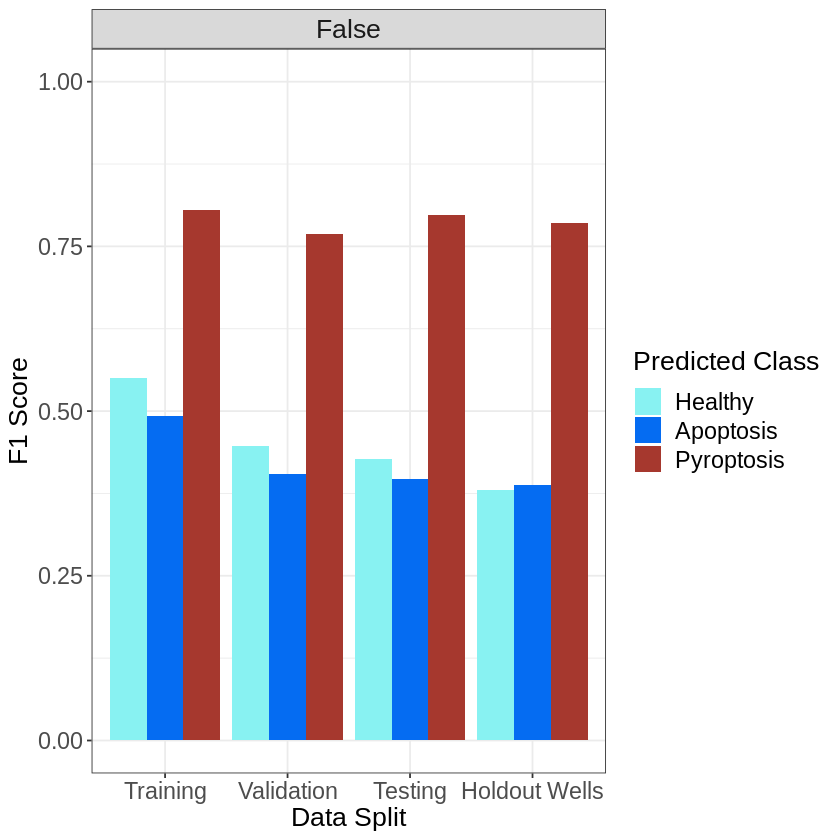

In [49]:
# bar plot of the F1 scores
f1_score_plot <- (
    ggplot(f1_scores, aes(x = group, y = value, fill = label))
    + geom_bar(stat = "identity", position = "dodge")
    + ylim(0, 1)
    + facet_wrap(~shuffled_data)
    + ylab("F1 Score")
    + xlab("Data Split")
    # change the legend title
    + labs(fill = "Predicted Class")
    # change the colours
    + scale_fill_manual(values = c(
        "Healthy" = "#88F2F2",
        "Apoptosis" = "#056CF2",
        "Pyroptosis" = "#A6382E"
    ))
    + figure_theme_wide
    
    

)
f1_score_plot